In [1]:
!pip install pyxdf
!pip install mne
!pip install pandas
!pip install --upgrade jupyterlab ipympl ipywidgets


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [2]:
import sys

print(sys.version)

3.9.6 (default, Apr 30 2025, 02:07:17) 
[Clang 17.0.0 (clang-1700.0.13.5)]


In [3]:
import pyxdf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mne
import pandas as pd
import os

In [4]:
csv_data = pd.read_csv('../../data/bundle_pricing/bundle_pricing_5_saata.csv', skiprows=1, skipfooter=6, engine='python')
csv_data

,timestamp_iso,participant_id,age,response_group,trial_index,block,bundle_id,focal_product,tiein_product,condition,focal_price,tiein_price,total_price,allocation_per_trial,response_key,response,rt_ms,valid_response,is_selected_bundle,bundles_bought_cumulative
0,2026-01-15T08:43:32.218,5,26,A,0,1,18,Red Wine 'Gonadze' Khvanchkara (Semi-Sweet) 0.75L,Wine Bottle Opener OEM TM39002,NP,31.96,11.20,43.16,70.0,NaN,NaN,NaN,0,0,0
1,2026-01-15T08:43:39.828,5,26,A,1,1,33,Board,Markers,NP,39.20,3.80,43.00,70.0,NaN,NaN,NaN,0,1,0
2,2026-01-15T08:43:47.471,5,26,A,2,1,11,Bacon,Eggs,LP,12.80,0.10,12.90,70.0,num_1,BUY,1216.47,1,0,1
3,2026-01-15T08:43:55.065,5,26,A,3,1,1,Wireless Mouse (Dell WM126 Black),Gembird mouse Pad Black,NP,40.90,2.40,43.30,70.0,num_3,NOBUY,1242.35,1,0,1
4,2026-01-15T08:44:02.741,5,26,A,4,1,21,Tea Box,Greenfield Tea,LP,35.88,0.10,35.98,70.0,num_3,NOBUY,1991.85,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2026-01-15T08:58:20.159,5,26,A,115,3,22,Beer,Peanuts,LP,13.76,0.10,13.86,70.0,num_1,BUY,1747.45,1,0,50
116,2026-01-15T08:58:27.735,5,26,A,116,3,12,Pesto,Pasta Barilla (Fussili),NP,18.72,4.76,23.48,70.0,num_3,NOBUY,906.58,1,0,50
117,2026-01-15T08:58:35.262,5,26,A,117,3,20,Arak (Georgian Brandy),Energy Drink Red Bull (250ml),LP,44.76,0.10,44.86,70.0,num_3,NOBUY,1329.18,1,0,50
118,2026-01-15T08:58:42.839,5,26,A,118,3,13,Cavear,Butter (President),NP,39.96,7.96,47.92,70.0,num_3,NOBUY,2096.22,1,0,50


In [5]:
zp_idx = csv_data[csv_data['condition'] == 'ZP'].index.values
np_idx = csv_data[csv_data['condition'] == 'NP'].index.values
lp_idx = csv_data[csv_data['condition'] == 'LP'].index.values
zp_idx, np_idx, lp_idx

(array([  9,  13,  16,  18,  19,  20,  21,  22,  25,  28,  29,  35,  36,
         39,  40,  46,  51,  53,  55,  57,  59,  71,  72,  78,  79,  83,
         84,  87,  88,  89,  94,  97,  98, 107, 109, 110, 111, 112, 113,
        119]),
 array([  0,   1,   3,   6,   7,   8,  10,  12,  15,  17,  26,  30,  33,
         37,  38,  43,  44,  47,  48,  49,  52,  56,  58,  64,  67,  75,
         76,  77,  80,  81,  82,  85,  86,  92,  96,  99, 106, 114, 116,
        118]),
 array([  2,   4,   5,  11,  14,  23,  24,  27,  31,  32,  34,  41,  42,
         45,  50,  54,  60,  61,  62,  63,  65,  66,  68,  69,  70,  73,
         74,  90,  91,  93,  95, 100, 101, 102, 103, 104, 105, 108, 115,
        117]))

In [6]:
xdf_path = '../../data/bundle_pricing/bundle_pricing_5_saata.xdf'
xdf_data = pyxdf.load_xdf(xdf_path)[0]
markers = xdf_data[1]
eeg = xdf_data[2]

Stream 3: Calculated effective sampling rate 0.0000 Hz is different from specified rate 250.0000 Hz.


In [7]:
# LSL Markers
MARKER_FIXATION = 10
MARKER_BUNDLE_PREVIEW = 20
MARKER_BUNDLE_PRICE_NP = 31
MARKER_BUNDLE_PRICE_LP = 32
MARKER_BUNDLE_PRICE_ZP = 33
MARKER_RESPONSE_BUY = 41
MARKER_RESPONSE_NOBUY = 42
MARKER_NO_RESPONSE = 50

In [8]:
# Read marker data
marker_time = markers['time_stamps']
time_offset = marker_time[0]
marker_time = marker_time - time_offset
marker_data = [x[0] for x in markers['time_series']]

In [9]:
CONST_OFFSET = 0.073  # Delay measured with photodiode that day

In [10]:
eeg_time = eeg['time_stamps']
eeg_time = eeg_time - time_offset - CONST_OFFSET
eeg_data = eeg['time_series'][:, :8]

In [11]:
# Create raw data
info = mne.create_info(ch_names=['Fz', 'C3', 'Cz', 'C4', 'Pz', 'PO7', 'Oz', 'PO8'], ch_types=['eeg'] * 8,
                       sfreq=250)
raw = mne.io.RawArray([1e-6 * eeg_data[:, i] for i in range(8)], info)
raw.notch_filter(freqs=[50])
raw.filter(0.5, 30)
raw

Creating RawArray with float64 data, n_channels=8, n_times=310728
    Range : 0 ... 310727 =      0.000 ...  1242.908 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband a

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


<RawArray | 8 x 310728 (1242.9 s), ~19.0 MB, data loaded>

In [12]:
events = []
for i, marker in enumerate(marker_data):
    eeg_start_index = np.argmax(eeg_time >= marker_time[i]) - 1
    events.append([eeg_start_index, 0, marker])
events = np.array(events)
# NOTE: We remove the last event because it is an artifact (end of recording)
events = events[:-1, :]
events, len(events)

(array([[ 55887,      0,     10],
        [ 56152,      0,     20],
        [ 56788,      0,     31],
        ...,
        [285873,      0,     20],
        [286481,      0,     33],
        [287093,      0,     41]]),
 480)

In [13]:
# NOTE: This is not needed
# Merge NP, LP, ZP into single event (with the value of 100) for epoching
# price_onset_events = mne.merge_events(events, [MARKER_BUNDLE_PRICE_LP, MARKER_BUNDLE_PRICE_NP, MARKER_BUNDLE_PRICE_ZP], 100)

In [14]:
# Define reject criteria
reject_criteria = dict(
    # eeg=100e-6,  # TODO: Set to 100 µV
    eeg=1e0
)

In [15]:
picks = ["Cz", "Pz"]
event_dict = dict(lp=MARKER_BUNDLE_PRICE_LP, np=MARKER_BUNDLE_PRICE_NP, zp=MARKER_BUNDLE_PRICE_ZP)
tmin, tmax = -0.2, 1
epochs = mne.Epochs(raw, events, event_id=event_dict, tmin=tmin, tmax=tmax, preload=True,
                    baseline=(None, 0 if tmin < 0 else None), picks=picks, reject=reject_criteria)

Not setting metadata
120 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 120 events and 301 original time points ...
0 bad epochs dropped


In [16]:
# Get indices for non-rejected epochs
drop_log = epochs.drop_log
drop_log_not_ignored = [log for log in drop_log if 'IGNORED' not in log]
good_epoch_indices = [i for (i, log) in enumerate(drop_log_not_ignored) if len(log) == 0]

In [17]:
# Keep only non-rejected epochs and events from CSV data
csv_data = csv_data.iloc[good_epoch_indices].reset_index(drop=True)
events = events[good_epoch_indices]
csv_data

,timestamp_iso,participant_id,age,response_group,trial_index,block,bundle_id,focal_product,tiein_product,condition,focal_price,tiein_price,total_price,allocation_per_trial,response_key,response,rt_ms,valid_response,is_selected_bundle,bundles_bought_cumulative
0,2026-01-15T08:43:32.218,5,26,A,0,1,18,Red Wine 'Gonadze' Khvanchkara (Semi-Sweet) 0.75L,Wine Bottle Opener OEM TM39002,NP,31.96,11.20,43.16,70.0,NaN,NaN,NaN,0,0,0
1,2026-01-15T08:43:39.828,5,26,A,1,1,33,Board,Markers,NP,39.20,3.80,43.00,70.0,NaN,NaN,NaN,0,1,0
2,2026-01-15T08:43:47.471,5,26,A,2,1,11,Bacon,Eggs,LP,12.80,0.10,12.90,70.0,num_1,BUY,1216.47,1,0,1
3,2026-01-15T08:43:55.065,5,26,A,3,1,1,Wireless Mouse (Dell WM126 Black),Gembird mouse Pad Black,NP,40.90,2.40,43.30,70.0,num_3,NOBUY,1242.35,1,0,1
4,2026-01-15T08:44:02.741,5,26,A,4,1,21,Tea Box,Greenfield Tea,LP,35.88,0.10,35.98,70.0,num_3,NOBUY,1991.85,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2026-01-15T08:58:20.159,5,26,A,115,3,22,Beer,Peanuts,LP,13.76,0.10,13.86,70.0,num_1,BUY,1747.45,1,0,50
116,2026-01-15T08:58:27.735,5,26,A,116,3,12,Pesto,Pasta Barilla (Fussili),NP,18.72,4.76,23.48,70.0,num_3,NOBUY,906.58,1,0,50
117,2026-01-15T08:58:35.262,5,26,A,117,3,20,Arak (Georgian Brandy),Energy Drink Red Bull (250ml),LP,44.76,0.10,44.86,70.0,num_3,NOBUY,1329.18,1,0,50
118,2026-01-15T08:58:42.839,5,26,A,118,3,13,Cavear,Butter (President),NP,39.96,7.96,47.92,70.0,num_3,NOBUY,2096.22,1,0,50


combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


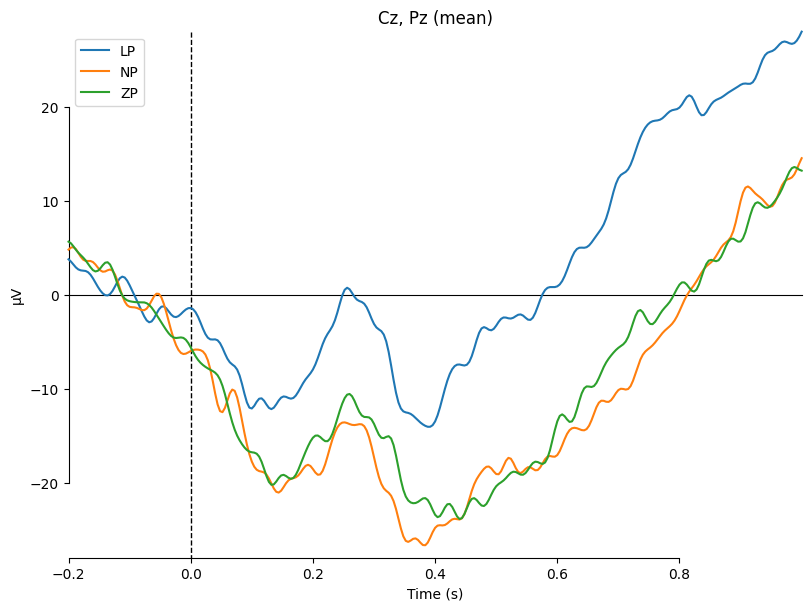

In [18]:
# Show data for Cz, Pz
mne.viz.plot_compare_evokeds(
    {"LP": epochs['lp'].average(),
     "NP": epochs['np'].average(),
     "ZP": epochs['zp'].average()},
    picks=['Cz', 'Pz'],
    combine='mean',
    show=True
)
plt.show()

/var/folders/g2/378vjvgj0vq1r9_l6pb_nbz00000gn/T/ipykernel_35056/3557494134.py:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds(


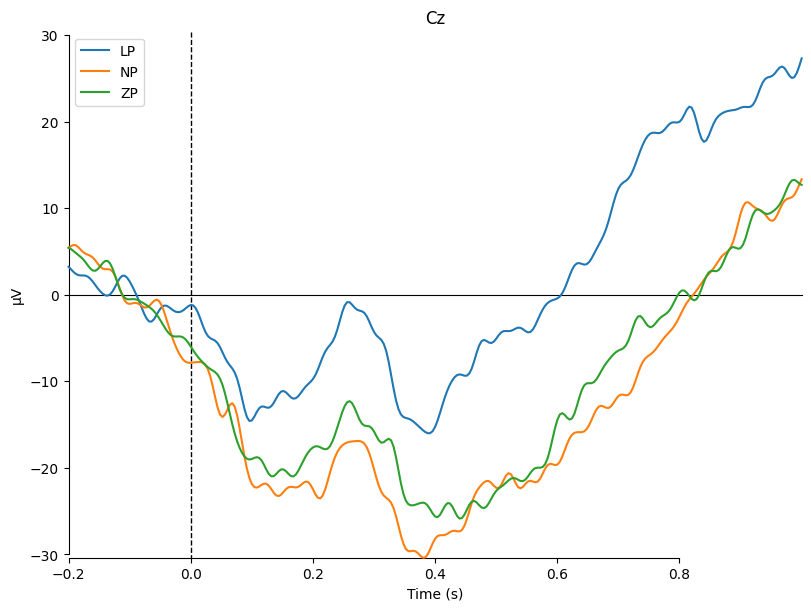

In [19]:
# Show data for Cz
mne.viz.plot_compare_evokeds(
    {"LP": epochs['lp'].average(),
     "NP": epochs['np'].average(),
     "ZP": epochs['zp'].average()},
    picks=['Cz'],
    show=True
)
plt.show()

/var/folders/g2/378vjvgj0vq1r9_l6pb_nbz00000gn/T/ipykernel_35056/638009523.py:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds(


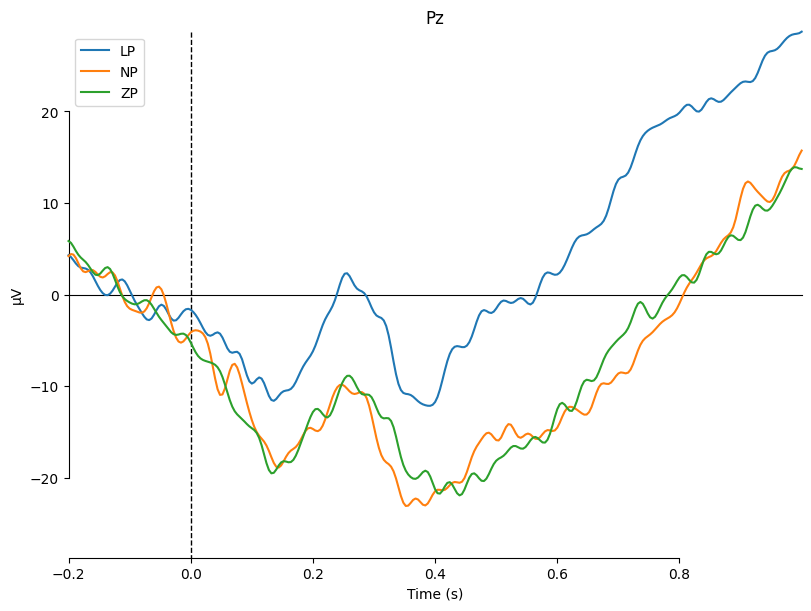

In [20]:
# Show data for Pz
mne.viz.plot_compare_evokeds(
    {"LP": epochs['lp'].average(),
     "NP": epochs['np'].average(),
     "ZP": epochs['zp'].average()},
    picks=['Pz'],
    show=True
)
plt.show()

In [21]:
# Now we can proceed to calculate mean ERPs amplitudes of LPP for the given subject in 400-600 ms time window
tmin, tmax = 0.4, 0.6
lp_amp = epochs['lp'].average().copy().crop(tmin, tmax).get_data().mean(axis=1)  # Across each channel
np_amp = epochs['np'].average().copy().crop(tmin, tmax).get_data().mean(axis=1)
zp_amp = epochs['zp'].average().copy().crop(tmin, tmax).get_data().mean(axis=1)
lp_amp, np_amp, zp_amp  # Channels: Cz, Pz

(array([-6.04628083e-06, -2.55320791e-06]),
 array([-2.31622637e-05, -1.69086448e-05]),
 array([-2.24055799e-05, -1.83207563e-05]))

In [22]:
# Instead of averaging across trials, we can assign mean amplitude per trial
cz_amps, pz_amps = np.array(
    [epochs[idx].copy().crop(tmin, tmax).get_data(picks=['Cz', 'Pz'])[0].mean(axis=1) for idx in range(len(epochs))]).T
# Assign computed Cz and Pz amplitudes to the csv_data dataframe
csv_data['Cz_LPP_400_600ms'] = cz_amps
csv_data['Pz_LPP_400_600ms'] = pz_amps
# Print means for each category and check that they are the same as before
print(csv_data.groupby('condition')[['Cz_LPP_400_600ms', 'Pz_LPP_400_600ms']].mean())
csv_data

           Cz_LPP_400_600ms  Pz_LPP_400_600ms
condition                                    
LP                -0.000006         -0.000003
NP                -0.000023         -0.000017
ZP                -0.000022         -0.000018


,timestamp_iso,participant_id,age,response_group,trial_index,block,bundle_id,focal_product,tiein_product,condition,...,total_price,allocation_per_trial,response_key,response,rt_ms,valid_response,is_selected_bundle,bundles_bought_cumulative,Cz_LPP_400_600ms,Pz_LPP_400_600ms
0,2026-01-15T08:43:32.218,5,26,A,0,1,18,Red Wine 'Gonadze' Khvanchkara (Semi-Sweet) 0.75L,Wine Bottle Opener OEM TM39002,NP,...,43.16,70.0,NaN,NaN,NaN,0,0,0,-0.000224,-0.000188
1,2026-01-15T08:43:39.828,5,26,A,1,1,33,Board,Markers,NP,...,43.00,70.0,NaN,NaN,NaN,0,1,0,-0.000028,-0.000020
2,2026-01-15T08:43:47.471,5,26,A,2,1,11,Bacon,Eggs,LP,...,12.90,70.0,num_1,BUY,1216.47,1,0,1,-0.000061,-0.000052
3,2026-01-15T08:43:55.065,5,26,A,3,1,1,Wireless Mouse (Dell WM126 Black),Gembird mouse Pad Black,NP,...,43.30,70.0,num_3,NOBUY,1242.35,1,0,1,-0.000088,-0.000081
4,2026-01-15T08:44:02.741,5,26,A,4,1,21,Tea Box,Greenfield Tea,LP,...,35.98,70.0,num_3,NOBUY,1991.85,1,0,1,-0.000176,-0.000167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2026-01-15T08:58:20.159,5,26,A,115,3,22,Beer,Peanuts,LP,...,13.86,70.0,num_1,BUY,1747.45,1,0,50,-0.000032,-0.000032
116,2026-01-15T08:58:27.735,5,26,A,116,3,12,Pesto,Pasta Barilla (Fussili),NP,...,23.48,70.0,num_3,NOBUY,906.58,1,0,50,-0.000012,-0.000003
117,2026-01-15T08:58:35.262,5,26,A,117,3,20,Arak (Georgian Brandy),Energy Drink Red Bull (250ml),LP,...,44.86,70.0,num_3,NOBUY,1329.18,1,0,50,0.000003,0.000003
118,2026-01-15T08:58:42.839,5,26,A,118,3,13,Cavear,Butter (President),NP,...,47.92,70.0,num_3,NOBUY,2096.22,1,0,50,-0.000008,-0.000006


In [23]:
# For all valid responses, for each condition, calculate: mean LPP amplitudes, response times, purchase rates, total spent
csv_data[csv_data['valid_response'] == 1].groupby('condition').agg(
    mean_Cz_LPP_400_600ms=('Cz_LPP_400_600ms', 'mean'),
    mean_Pz_LPP_400_600ms=('Pz_LPP_400_600ms', 'mean'),
    mean_response_time_ms=('rt_ms', 'mean'),
    total_spent=('total_price', 'sum'),
    mean_spent=('total_price', 'mean'),
    total_trials=('response', 'count'),
    total_bought=('response', lambda x: list(x).count('BUY')),
    purchase_rate=('response', lambda x: list(x).count('BUY') / len(x) * 100)
)

,mean_Cz_LPP_400_600ms,mean_Pz_LPP_400_600ms,mean_response_time_ms,total_spent,mean_spent,total_trials,total_bought,purchase_rate
condition,,,,,,,,
LP,-0.000006,-0.000003,1952.432250,1563.01,39.075250,40,17,42.500000
NP,-0.000019,-0.000013,2132.721765,1290.42,37.953529,34,12,35.294118
ZP,-0.000021,-0.000017,2267.526842,1451.81,38.205526,38,22,57.894737


In [24]:
# Utility that matches events & markers while reading xdf
# Preprocess data according to paper
# Analyze data (pingouin)
# Add visuals